## Practical Work 1

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score


#### Read RegData csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [24]:
df = pd.read_csv("../DAY 3/RegData.csv",header = None, names = ['x1','y_target'])
df

,x1,y_target
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9
5,6.9,6.1
6,6.1,6.0
7,6.2,5.8
8,6.0,5.2
9,5.1,4.2


In [25]:
df.insert(0,'x0',1)

#### Explore your data

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x0        13 non-null     int64  
 1   x1        13 non-null     float64
 2   y_target  13 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 440.0 bytes


#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [27]:
df

,x0,x1,y_target
0,1,2.9,4.0
1,1,6.7,7.4
2,1,4.9,5.0
3,1,7.9,7.2
4,1,9.8,7.9
5,1,6.9,6.1
6,1,6.1,6.0
7,1,6.2,5.8
8,1,6.0,5.2
9,1,5.1,4.2


In [28]:
x = df.loc[:,['x0','x1']]
y = df.loc[:,['y_target']]

#### Explore your data

In [29]:
x

,x0,x1
0,1,2.9
1,1,6.7
2,1,4.9
3,1,7.9
4,1,9.8
5,1,6.9
6,1,6.1
7,1,6.2
8,1,6.0
9,1,5.1


In [30]:
y

,y_target
0,4.0
1,7.4
2,5.0
3,7.2
4,7.9
5,6.1
6,6.0
7,5.8
8,5.2
9,4.2


#### Plot the original data (scatter plot of X,y)

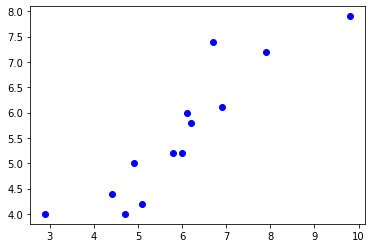

In [31]:
plt.scatter(x.x1, y, c ="blue")

## LR Full Implementation

### Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. Also choose the Learning rate. 

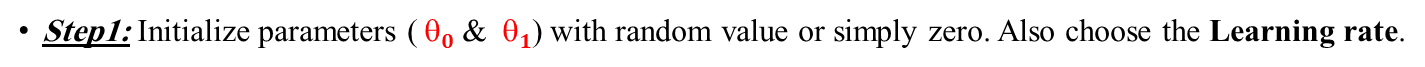

In [32]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))
print("X- Matrix :\n",x)
print("x_shape",x.shape)
print("y- Matrix :\n",y)
print("y_shape",y.shape)


X- Matrix :
 [[1.         2.9000001 ]
 [1.         6.69999981]
 [1.         4.9000001 ]
 [1.         7.9000001 ]
 [1.         9.80000019]
 [1.         6.9000001 ]
 [1.         6.0999999 ]
 [1.         6.19999981]
 [1.         6.        ]
 [1.         5.0999999 ]
 [1.         4.69999981]
 [1.         4.4000001 ]
 [1.         5.80000019]]
x_shape (13, 2)
y- Matrix :
 [[4.        ]
 [7.4000001 ]
 [5.        ]
 [7.19999981]
 [7.9000001 ]
 [6.0999999 ]
 [6.        ]
 [5.80000019]
 [5.19999981]
 [4.19999981]
 [4.        ]
 [4.4000001 ]
 [5.19999981]]
y_shape (13, 1)


### Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.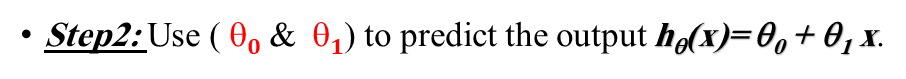
#### Note: you will need to iterate through all data points

In [75]:
alpha = 0.001
itera =100

### Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).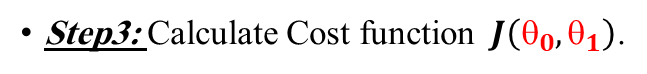
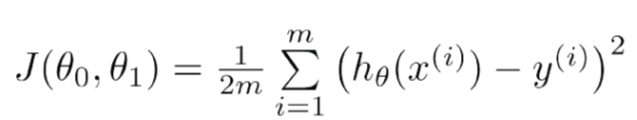

In [76]:
def lossFunction (X,Y,theta):
    error = np.power(((X * theta.T)-Y) , 2)
#     print(z)
    res = np.sum(error) / (2 * len(X))
#     print(loss_f_res)
    return res
lossFunction (x,y,theta)

16.305384479692318

### Step4: Calculate the gradient.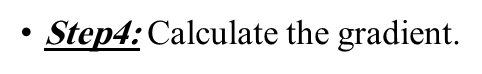
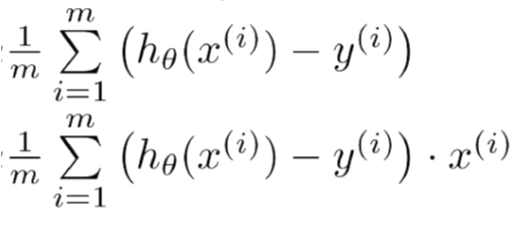

In [77]:
def stocashtic_gradient_descent(X,Y,theta,alpha,iteration):     #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iteration)
    thetas = int(theta.ravel().shape[1])   # to get numper of thetas with code not manually
    theta_0= []
    theta_1= []
    hypothesis = []
    for i in range(iteration):
        error = (X * theta.T)- Y
        hypothesis.append(X * theta.T)
        for j in range(thetas):
            term = np.multiply(error , X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = lossFunction(X,Y,theta)
        theta_0.append(theta[0,0])
        theta_1.append(theta[0,1])
    return theta , cost ,theta_0 , theta_1 , hypothesis




### Step5: Update the parameters (simultaneously).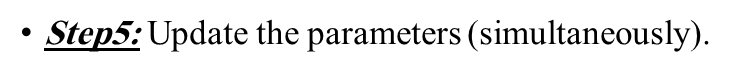
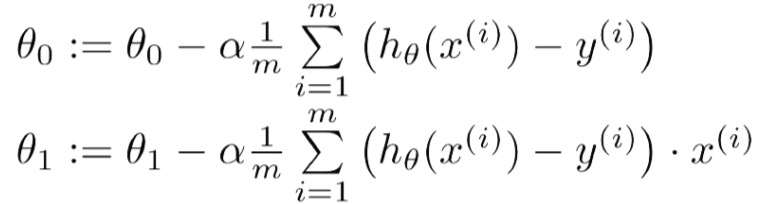

### Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.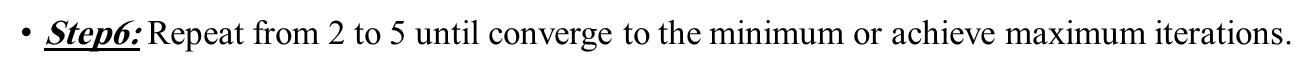

In [78]:
theta_new , cost , theta_zero , theta_one , hypothesis= gradient_decent(x,y,theta,alpha,itera)
print("New values of theta :" ,theta_new)
print("\nNew values of theta zero \n\n :" ,theta_zero)
print("\n\nNew values of theta one \n\n :" ,theta_one)
print("hypothesis list",hypothesis)

New values of theta : [[0.14651653 0.87874169]]

New values of theta zero 

 : [0.00556923073976923, 0.010924246580564925, 0.01607342171768198, 0.021024802968708463, 0.025786122571909754, 0.030364810484277395, 0.03476800619880247, 0.03900257009976888, 0.04307509437412689, 0.04699191349630147, 0.05075911430311137, 0.054382545674823, 0.057867827837736724, 0.06122036130310127, 0.06444533545657348, 0.06754773681188488, 0.07053235694184239, 0.0734038000992775, 0.07616649054006469, 0.07882467955985664, 0.08138245225572771, 0.08384373402348033, 0.08621229680094802, 0.08849176506722502, 0.09068562160736424, 0.09279721305171221, 0.0948297551986913, 0.09678633812949505, 0.09866993112283147, 0.10048338737753115, 0.10222944855053148, 0.10391074911745458, 0.10552982056271436, 0.1070890954058171, 0.1085909110702593, 0.11003751360117627, 0.1114310612376543, 0.11277362784538818, 0.11406720621514366, 0.11531371123227104, 0.11651498292231093, 0.11767278937753627, 0.1187888295690851, 0.11986473604915691,

In [79]:
theta_zero = np.array(theta_zero)
theta_one = np.array(theta_one)
print("\n theta zero shape \n\n :" ,theta_zero.shape)
print("\n\n theta one shape \n\n :" ,theta_one.shape)
print("\n\n cost shape \n\n :" ,cost.shape)



 theta zero shape 

 : (100,)


 theta one shape 

 : (100,)


 cost shape 

 : (100,)


#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x

In [80]:
y_hat = theta_new[0,0] + (theta_new[0,1] * df.x1)
y_hat

0     2.694868
1     6.034086
2     4.452351
3     7.088576
4     8.758185
5     6.209834
6     5.506841
7     5.594715
8     5.418967
9     4.628099
10    4.276602
11    4.012980
12    5.243218
Name: x1, dtype: float64

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,y)

Text(0, 0.5, 'y1- data')

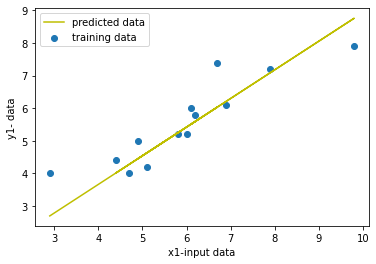

In [81]:

fig ,ax =plt.subplots()
ax.plot(df.x1 , y_hat , 'y', label='predicted data')
ax.scatter(df.x1 , df.y_target , label='training data')
ax.legend(loc=2)
ax.set_xlabel('x1-input data')
ax.set_ylabel('y1- data')

#### Use R2 score to evaluate LR equation output
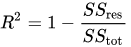
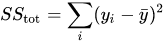
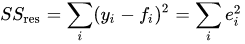
https://en.wikipedia.org/wiki/Coefficient_of_determination

## GD vectorize Implementation
### Implement GD without iterate through data points i.e. use vector operations

#### Plot the output and calculate R2 score
##### Make sure that you obtained the same results

## Plot loss function
### Repeat your last vectorized implementaion version and save loss for each iteration (epoch)

### Plot loss vs. iterations

Text(0.5, 1.0, 'Error vs. training Epoc')

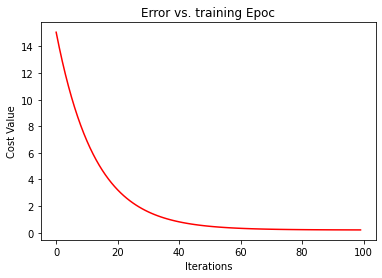

In [82]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. training Epoc')

Text(0.5, 1.0, 'Error vs. theta_zero')

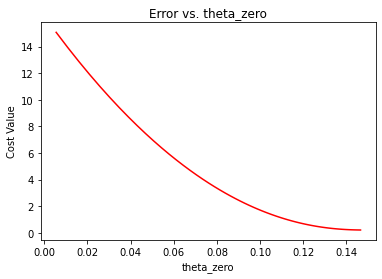

In [83]:
fig,ax = plt.subplots()
ax.plot(theta_zero, cost ,'r')

ax.set_xlabel('theta_zero')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_zero')

Text(0.5, 1.0, 'Error vs. theta_one')

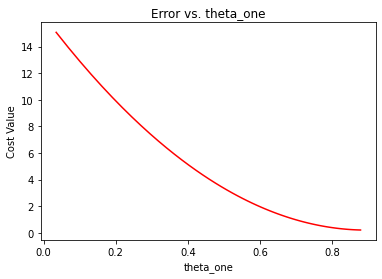

In [84]:
fig,ax = plt.subplots()
ax.plot(theta_one, cost ,'r')

ax.set_xlabel('theta_one')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_one')

In [87]:
r2_score(df.y_target, y_hat) * 100

74.06996532992383

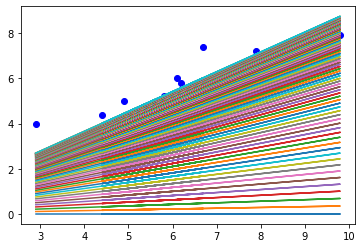

In [95]:
plt.scatter(df.x1, df.y_target, c ="blue")
for i in hypothesis :
    plt.plot( df.x1,i)


## Multivariate LR

#### Read MultipleLR csv file into numpy array  (check your data)
##### Data source
https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html


In [3]:
df = pd.read_csv("../DAY 3/MultipleLR.csv",header = None, names = ['x1','x2','x3','y_target'])
df.insert(0,'x0',1)
df


,x0,x1,x2,x3,y_target
0,1,73,80,75,152
1,1,93,88,93,185
2,1,89,91,90,180
3,1,96,98,100,196
4,1,73,66,70,142
5,1,53,46,55,101
6,1,69,74,77,149
7,1,47,56,60,115
8,1,87,79,90,175
9,1,79,70,88,164


In [4]:
alpha = 0.0001
itera = 100

In [5]:
x = df.loc[:,['x0','x1','x2','x3']]
x

,x0,x1,x2,x3
0,1,73,80,75
1,1,93,88,93
2,1,89,91,90
3,1,96,98,100
4,1,73,66,70
5,1,53,46,55
6,1,69,74,77
7,1,47,56,60
8,1,87,79,90
9,1,79,70,88


In [6]:
y = df.loc[:,['y_target']]
y

,y_target
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


In [7]:
x = np.matrix(x)
y = np.matrix(y)
theta = np.matrix(np.array([0,0,0,0]))
print("X- Matrix :\n",x)
print("x_shape",x.shape)
print("y- Matrix :\n",y)
print("y_shape",y.shape)
print("theta shape",theta.shape)

X- Matrix :
 [[  1  73  80  75]
 [  1  93  88  93]
 [  1  89  91  90]
 [  1  96  98 100]
 [  1  73  66  70]
 [  1  53  46  55]
 [  1  69  74  77]
 [  1  47  56  60]
 [  1  87  79  90]
 [  1  79  70  88]
 [  1  69  70  73]
 [  1  70  65  74]
 [  1  93  95  91]
 [  1  79  80  73]
 [  1  70  73  78]
 [  1  93  89  96]
 [  1  78  75  68]
 [  1  81  90  93]
 [  1  88  92  86]
 [  1  78  83  77]
 [  1  82  86  90]
 [  1  86  82  89]
 [  1  78  83  85]
 [  1  76  83  71]
 [  1  96  93  95]]
x_shape (25, 4)
y- Matrix :
 [[152]
 [185]
 [180]
 [196]
 [142]
 [101]
 [149]
 [115]
 [175]
 [164]
 [141]
 [141]
 [184]
 [152]
 [148]
 [192]
 [147]
 [183]
 [177]
 [159]
 [177]
 [175]
 [175]
 [149]
 [192]]
y_shape (25, 1)
theta shape (1, 4)


In [8]:
def lossFunction (X,Y,theta):
    error = np.power(((X * theta.T)-Y) , 2)
#     print(z)
    res = np.sum(error) / (2 * len(X))
#     print(loss_f_res)
    return res

                                  



In [9]:
def gradient_decent(X,Y,theta,alpha,iteration):     #theta_new= theta_old - (alpha * 1/m *(summation(h(xi) - y ) *xi)
    temp = np.matrix(np.zeros(theta.shape))
    cost = np.zeros(iteration)
    thetas = int(theta.ravel().shape[1])   # to get numper of thetas with code not manually
    theta_0= []
    theta_1= []
    theta_2= []
    theta_3= []
    for i in range(iteration):
        error = (X * theta.T)- Y
        
        for j in range(thetas):
            term = np.multiply(error , X[:,j])
            temp[0,j] = theta[0,j] - ((alpha/len(X)) * np.sum(term))
        
        theta = temp
        cost[i] = lossFunction(X,Y,theta)
        theta_0.append(theta[0,0])
        theta_1.append(theta[0,1])
        theta_2.append(theta[0,2])  
        theta_3.append(theta[0,3])  

    return theta , cost ,theta_0 , theta_1 , theta_2 , theta_3

In [10]:
theta_new , cost , theta_zero , theta_one , theta_two , theta_three = gradient_decent(x,y,theta,alpha,itera)
print("New values of theta :" ,theta_new)
print("\nNew values of theta zero \n\n :" ,theta_zero)
print("\n\nNew values of theta one \n\n :" ,theta_one)
print("\nNew values of theta two \n\n :" ,theta_two)
print("\n\nNew values of theta three \n\n :" ,theta_three)

New values of theta : [[0.00789687 0.61841652 0.6192408  0.7523814 ]]

New values of theta zero 

 : [0.016204, 0.0006488959360000015, 0.015574194121588988, 0.0012462597651513533, 0.014993747010031554, 0.0017961537300192256, 0.01445876037410953, 0.0023023195673085688, 0.01396564352266879, 0.002768203796511671, 0.013511089094144071, 0.0031969810132186863, 0.01309205070108502, 0.0035915753445281712, 0.012705722338585159, 0.003954680211572531, 0.012349519417437367, 0.00428877653273122, 0.012021061293820964, 0.004596149490565306, 0.011718155177440258, 0.0048789039757993966, 0.011438781309351373, 0.005138978812735146, 0.01118107930929572, 0.005378159862244469, 0.010943335600263157, 0.005598092090904167, 0.010723971825288729, 0.005800290687846033, 0.010521534178193261, 0.0059861513044600426, 0.010334683576155392, 0.006156959486159676, 0.010162186607692403, 0.006313899359957737, 0.010002907194868196, 0.006458061636571016, 0.009855798913374094, 0.006590450981139245, 0.009719897918574666, 0.006

### Repeat your implementation but for more than one variable

#### Predict y values using the LR equation
##### h(x)= theta_0 + theta_1 * x1 + theta_2 * x2 + theta_3 * x3

### Plot loss vs. iterations

Text(0.5, 1.0, 'Error vs. training Epoc')

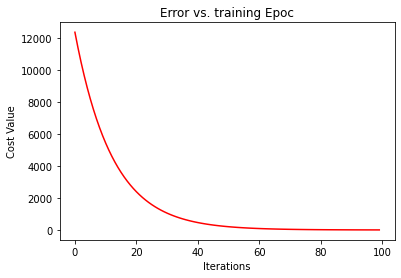

In [11]:
fig,ax = plt.subplots()
ax.plot(np.arange(itera), cost ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. training Epoc')

In [12]:
theta_zero = np.array(theta_zero)
print(theta_zero.shape)
print(cost.shape)
theta_one = np.array(theta_one)
print(type(theta_one))
theta_two = np.array(theta_two)
print(theta_zero.shape)
theta_three = np.array(theta_three)
print(theta_zero.shape)


(100,)
(100,)
<class 'numpy.ndarray'>
(100,)
(100,)


Text(0.5, 1.0, 'Error vs. theta_zero')

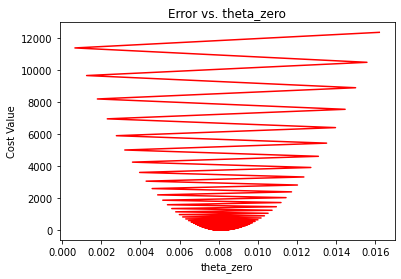

In [13]:
fig,ax = plt.subplots()
ax.plot(theta_zero, cost ,'r')

ax.set_xlabel('theta_zero')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_zero')

Text(0.5, 1.0, 'Error vs. theta_one')

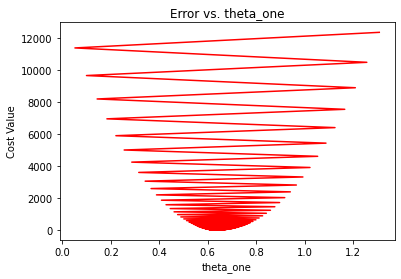

In [14]:
fig,ax = plt.subplots()
ax.plot(theta_one, cost ,'r')

ax.set_xlabel('theta_one')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_one')

Text(0.5, 1.0, 'Error vs. theta_two')

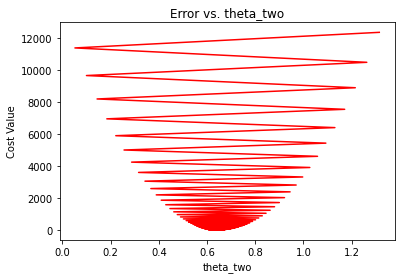

In [15]:
fig,ax = plt.subplots()
ax.plot(theta_two, cost ,'r')

ax.set_xlabel('theta_two')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_two')


Text(0.5, 1.0, 'Error vs. theta_three')

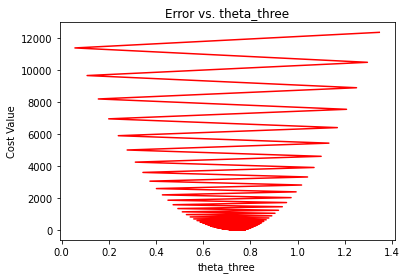

In [16]:
fig,ax = plt.subplots()
ax.plot(theta_three, cost ,'r')

ax.set_xlabel('theta_three')
ax.set_ylabel('Cost Value')
ax.set_title('Error vs. theta_three')


In [17]:
y_hat = (theta_new[0,0] * df.x0) + (theta_new[0,1] * df.x1) + (theta_new[0,2] * df.x2) + (theta_new[0,3] * df.x3)
y_hat

0     151.120172
1     181.985294
2     179.112206
3     195.299621
4     138.688894
5     102.650026
6     146.435824
7     108.893842
8     170.444483
9     158.419221
10    140.949335
11    139.223929
12    184.815217
13    153.325908
14    147.187381
15    184.861679
16    145.849381
17    175.802777
18    176.103505
19    157.574740
20    171.687086
21    170.931408
22    163.593791
23    151.823618
24    188.441510
dtype: float64

#### Use R2 score to evaluate LR equation output

In [18]:
r2_score(df.y_target, y_hat) * 100

96.90624236630153

# Bonus
## LR Using sklearn

### Single Variable

#### Build a LR model usin linearmodel.LinearRegression() from sklearn library

#### Train the model (fit the model to the training data)

#### Predict y values using the trained model

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

#### Use R2 score to evaluate model output

### Repeat for Mulivariate